### TASK 2

##### Project Overview
This project focuses on analyzing well production and cycle time data to derive insights for operational optimization and resource allocation. By examining key metrics such as cycle time, total production, and post-peak 90-day production, we aim to identify patterns and areas for improvement in well performance.

##### Objectives
- **Analyze Cycle Times**: Understand the duration between spud and completion dates for wells across different counties.
- **Evaluate Production Metrics**: Identify high-performing counties and wells with significant contributions to total production.
- **Highlight Operational Challenges**: Pinpoint inefficiencies in regions with prolonged cycle times or low production.

##### Tools and Methodology
- **Tools Used**: Python libraries such as `pandas` for data manipulation and `matplotlib` for visualization.
- **Datasets**:
  - **Well Header Data**
  - **Monthly Production Data**
- **Process**:
  - Data cleaning and transformation to handle missing or inconsistent data.
  - Merging and aggregating datasets to calculate metrics like cycle time and peak production.
  - Visualizations to depict trends and insights clearly.

This analysis provides actionable recommendations to enhance operational efficiency and prioritize investments in high-yielding regions.


 ### Import Libraries and Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Load the CSV files
well_header_path = 'well_header.csv'
monthly_production_path = 'monthly_production.csv'

# Read data into DataFrames
well_header_df = pd.read_csv(well_header_path, delimiter='|')
monthly_production_df = pd.read_csv(monthly_production_path, delimiter='|')



In [2]:
well_header_df.head(5)

,well_id,county,spud_date,completion_date
0,1,County 1,2014-08-12,2015-02-21
1,2,County 1,2019-10-06,2020-07-02
2,3,County 1,2013-01-15,2013-05-23
3,4,County 1,2017-10-13,2018-04-18
4,5,County 9,2011-05-29,2011-12-19


In [3]:
monthly_production_df.head(5)

,well_id,year,month,production
0,1,2015,2,14428.50
1,1,2015,3,32068.83
2,1,2015,4,21357.00
3,1,2015,5,21153.83
4,1,2015,6,15515.00


Purpose: This cell imports the necessary libraries and reads the provided CSV files into pandas DataFrames.
#### Files:

- well_header.csv: Contains well metadata (e.g., spud and completion dates, county information).
- monthly_production.csv: Contains monthly production data for wells.

In [4]:
print(f"The Datatypes of columns in well Head:\n{well_header_df.dtypes}")
print(f"The Datatypes of columns in Monthly Production:\n{monthly_production_df.dtypes}")


The Datatypes of columns in well Head:
well_id             int64
county             object
spud_date          object
completion_date    object
dtype: object
The Datatypes of columns in Monthly Production:
well_id         int64
year            int64
month           int64
production    float64
dtype: object


### Data Import and Preparation

##### Overview
This section involves importing the necessary libraries and loading the provided CSV files into **pandas DataFrames** for further analysis. The datasets contain metadata and production details for wells.

##### Code Breakdown
##### Libraries Imported
- `pandas`: For data manipulation and analysis.
- `matplotlib.pyplot`: For creating visualizations.
- `datetime`: For handling date and time-related operations.

##### CSV Files Loaded
1. **well_header.csv**:
   - Contains metadata for wells, such as spud and completion dates and county information.
   - Loaded into the DataFrame: `well_header_df`.

2. **monthly_production.csv**:
   - Contains monthly production data for each well, grouped by year and month.
   - Loaded into the DataFrame: `monthly_production_df`.

##### Sample Data (First 5 Rows)
###### well_header.csv
| well_id | county   | spud_date   | completion_date |
|---------|----------|-------------|-----------------|
| 1       | County 1 | 2014-08-12  | 2015-02-21      |
| 2       | County 1 | 2019-10-06  | 2020-07-02      |
| 3       | County 1 | 2013-01-15  | 2013-05-23      |
| 4       | County 1 | 2017-10-13  | 2018-04-18      |
| 5       | County 9 | 2011-05-29  | 2011-12-19      |

###### monthly_production.csv
| well_id | year | month | production |
|---------|------|-------|------------|
| 1       | 2015 | 2     | 14428.50   |
| 1       | 2015 | 3     | 32068.83   |
| 1       | 2015 | 4     | 21357.00   |
| 1       | 2015 | 5     | 21153.83   |
| 1       | 2015 | 6     | 15515.00   |

##### Datatypes of Columns
###### well_header DataFrame
| Column           | DataType |
|-------------------|----------|
| well_id           | int64    |
| county            | object   |
| spud_date         | object   |
| completion_date   | object   |

###### monthly_production DataFrame
| Column      | DataType |
|-------------|----------|
| well_id     | int64    |
| year        | int64    |
| month       | int64    |
| production  | float64  |


 ### Data Cleaning and Transformation

In [5]:
# Convert date columns to datetime in well_header_df
well_header_df['spud_date'] = pd.to_datetime(well_header_df['spud_date'], errors='coerce')
well_header_df['completion_date'] = pd.to_datetime(well_header_df['completion_date'], errors='coerce')

In [6]:
# Calculate cycle times (days)
well_header_df['cycle_time'] = (well_header_df['completion_date'] - well_header_df['spud_date']).dt.days

In [7]:
# Convert year and month to integer and production to numeric
monthly_production_df['year'] = monthly_production_df['year'].astype(int)
monthly_production_df['month'] = monthly_production_df['month'].astype(int)
monthly_production_df['production'] = pd.to_numeric(monthly_production_df['production'], errors='coerce')

In [8]:
print(well_header_df.info())
print(well_header_df.isnull().sum())
print(well_header_df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16263 entries, 0 to 16262
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   well_id          16263 non-null  int64         
 1   county           16263 non-null  object        
 2   spud_date        16263 non-null  datetime64[ns]
 3   completion_date  16263 non-null  datetime64[ns]
 4   cycle_time       16263 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 635.4+ KB
None
well_id            0
county             0
spud_date          0
completion_date    0
cycle_time         0
dtype: int64
            well_id    cycle_time
count  16263.000000  16263.000000
mean    8132.000000    212.194921
std     4694.868049    212.928398
min        1.000000     16.000000
25%     4066.500000    106.000000
50%     8132.000000    159.000000
75%    12197.500000    236.000000
max    16263.000000   6513.000000


In [9]:
monthly_production_df.info()
print(monthly_production_df.isnull().sum())
print(monthly_production_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483884 entries, 0 to 1483883
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   well_id     1483884 non-null  int64  
 1   year        1483884 non-null  int32  
 2   month       1483884 non-null  int32  
 3   production  1483884 non-null  float64
dtypes: float64(1), int32(2), int64(1)
memory usage: 34.0 MB
well_id       0
year          0
month         0
production    0
dtype: int64
            well_id          year         month    production
count  1.483884e+06  1.483884e+06  1.483884e+06  1.483884e+06
mean   8.118883e+03  2.018262e+03  6.636021e+00  3.866706e+03
std    4.685520e+03  3.545632e+00  3.453021e+00  5.890695e+03
min    1.000000e+00  2.000000e+03  1.000000e+00  1.700000e-01
25%    4.053000e+03  2.016000e+03  4.000000e+00  9.958300e+02
50%    8.106000e+03  2.019000e+03  7.000000e+00  2.005830e+03
75%    1.215800e+04  2.021000e+03  1.000000e+01  4.050000e

In [10]:
# Merge well header and production data on well_id
merged_df = pd.merge(monthly_production_df, well_header_df, on='well_id', how='inner')
merged_df.head()

,well_id,year,month,production,county,spud_date,completion_date,cycle_time
0,1,2015,2,14428.50,County 1,2014-08-12,2015-02-21,193
1,1,2015,3,32068.83,County 1,2014-08-12,2015-02-21,193
2,1,2015,4,21357.00,County 1,2014-08-12,2015-02-21,193
3,1,2015,5,21153.83,County 1,2014-08-12,2015-02-21,193
4,1,2015,6,15515.00,County 1,2014-08-12,2015-02-21,193


In [11]:
# Create a date column for production data
monthly_production_df['date'] = pd.to_datetime(monthly_production_df['year'].astype(str) + '-' + monthly_production_df['month'].astype(str) + '-01')

# Find the peak production for each well
peak_data = monthly_production_df.loc[monthly_production_df.groupby('well_id')['production'].idxmax()]
#monthly_production_df.head()
peak_data

,well_id,year,month,production,date
1,1,2015,3,32068.83,2015-03-01
108,2,2020,10,47577.00,2020-10-01
147,3,2013,6,18721.17,2013-06-01
274,4,2018,5,70118.50,2018-05-01
341,5,2012,1,14839.00,2012-01-01
...,...,...,...,...,...
1483405,16259,2020,1,37602.67,2020-01-01
1483454,16260,2019,8,41526.83,2019-08-01
1483512,16261,2014,12,23471.17,2014-12-01
1483615,16262,2014,7,9116.50,2014-07-01


In [12]:
# Add start_date (peak date) and end_date (90 days later) columns
peak_data['start_date'] = peak_data['date']
peak_data['end_date'] = peak_data['start_date'] + pd.DateOffset(months=3)
peak_data

,well_id,year,month,production,date,start_date,end_date
1,1,2015,3,32068.83,2015-03-01,2015-03-01,2015-06-01
108,2,2020,10,47577.00,2020-10-01,2020-10-01,2021-01-01
147,3,2013,6,18721.17,2013-06-01,2013-06-01,2013-09-01
274,4,2018,5,70118.50,2018-05-01,2018-05-01,2018-08-01
341,5,2012,1,14839.00,2012-01-01,2012-01-01,2012-04-01
...,...,...,...,...,...,...,...
1483405,16259,2020,1,37602.67,2020-01-01,2020-01-01,2020-04-01
1483454,16260,2019,8,41526.83,2019-08-01,2019-08-01,2019-11-01
1483512,16261,2014,12,23471.17,2014-12-01,2014-12-01,2015-03-01
1483615,16262,2014,7,9116.50,2014-07-01,2014-07-01,2014-10-01


In [13]:
# Merge peak_data back with monthly production data to filter the 90-day window
monthly_production_with_peak = monthly_production_df.merge(
    peak_data[['well_id', 'start_date', 'end_date']],
    on='well_id',
    how='left'
)
monthly_production_with_peak.head()

,well_id,year,month,production,date,start_date,end_date
0,1,2015,2,14428.50,2015-02-01,2015-03-01,2015-06-01
1,1,2015,3,32068.83,2015-03-01,2015-03-01,2015-06-01
2,1,2015,4,21357.00,2015-04-01,2015-03-01,2015-06-01
3,1,2015,5,21153.83,2015-05-01,2015-03-01,2015-06-01
4,1,2015,6,15515.00,2015-06-01,2015-03-01,2015-06-01


In [14]:
# Filter rows within the 90-day window
monthly_production_with_peak['in_window'] = (
    (monthly_production_with_peak['date'] >= monthly_production_with_peak['start_date']) &
    (monthly_production_with_peak['date'] < monthly_production_with_peak['end_date'])
)


In [15]:
# Group by well_id and sum production within the 90-day window
post_peak_90_day = (
    monthly_production_with_peak[monthly_production_with_peak['in_window']]
    .groupby('well_id')['production']
    .sum()
)

# Add the post-peak 90-day production to merged_df
merged_df = merged_df.merge(post_peak_90_day, on='well_id', how='left', suffixes=('', '_post_peak_90_day'))

# Rename the column for clarity
merged_df.rename(columns={'production_post_peak_90_day': 'post_peak_90_day'}, inplace=True)

# Display the resulting DataFrame
merged_df['post_peak_90_day']
merged_df.head()


,well_id,year,month,production,county,spud_date,completion_date,cycle_time,post_peak_90_day
0,1,2015,2,14428.50,County 1,2014-08-12,2015-02-21,193,74579.66
1,1,2015,3,32068.83,County 1,2014-08-12,2015-02-21,193,74579.66
2,1,2015,4,21357.00,County 1,2014-08-12,2015-02-21,193,74579.66
3,1,2015,5,21153.83,County 1,2014-08-12,2015-02-21,193,74579.66
4,1,2015,6,15515.00,County 1,2014-08-12,2015-02-21,193,74579.66


### Data Cleaning and Transformation

#### Objective
To prepare the data for analysis by performing cleaning operations, calculating key metrics, and adding derived features for better insights.

---

### Detailed Steps

#### 1. **Converting Date Columns**
- Ensure `spud_date` and `completion_date` columns in the `well_header_df` DataFrame are in `datetime` format for time-based calculations.

    ```python
    well_header_df['spud_date'] = pd.to_datetime(well_header_df['spud_date'], errors='coerce')
    well_header_df['completion_date'] = pd.to_datetime(well_header_df['completion_date'], errors='coerce')
    ```
- Both columns are converted to `datetime64[ns]` format, enabling date arithmetic.

---

#### 2. **Calculating Cycle Times**
-  Compute the time (in days) between the spud date and completion date for each well.
 
    ```python
    well_header_df['cycle_time'] = (well_header_df['completion_date'] - well_header_df['spud_date']).dt.days
    ```
-  A new column `cycle_time` is added, representing the number of days taken to complete the well.

---

#### 3. **Standardizing Data Types in Monthly Production Data**
-  Ensure data consistency for the `year`, `month`, and `production` columns in the `monthly_production_df` DataFrame.

    ```python
    monthly_production_df['year'] = monthly_production_df['year'].astype(int)
    monthly_production_df['month'] = monthly_production_df['month'].astype(int)
    monthly_production_df['production'] = pd.to_numeric(monthly_production_df['production'], errors='coerce')
    ```
- All specified columns are converted to numeric or integer types for easier analysis.

---

#### 4. **Merging Datasets**
- Combine the metadata (`well_header_df`) and production data (`monthly_production_df`) into a single dataset for comprehensive analysis.
 
    ```python
    merged_df = pd.merge(monthly_production_df, well_header_df, on='well_id', how='inner')
    ```
- A merged DataFrame `merged_df` containing both well metadata and production data.

---

#### 5. **Identifying Peak Production**
- Determine the peak production value and its corresponding date for each well.
 
    ```python
    peak_data = monthly_production_df.loc[monthly_production_df.groupby('well_id')['production'].idxmax()]
    ```
-  A new DataFrame `peak_data` with peak production values and dates for each well.

---

#### 6. **Adding a 90-Day Production Window**
- Define a time window starting from the peak production date and extending 90 days to evaluate short-term well performance.
 
    ```python
    peak_data['start_date'] = peak_data['date']
    peak_data['end_date'] = peak_data['start_date'] + pd.DateOffset(months=3)
    ```
- Two new columns, `start_date` and `end_date`, are added to define the 90-day window for each well.

---

#### 7. **Filtering and Summing Production Within the 90-Day Window**
- Calculate the total production within the 90-day window for each well.

    ```python
    monthly_production_with_peak['in_window'] = (
        (monthly_production_with_peak['date'] >= monthly_production_with_peak['start_date']) &
        (monthly_production_with_peak['date'] < monthly_production_with_peak['end_date'])
    )
    post_peak_90_day = (
        monthly_production_with_peak[monthly_production_with_peak['in_window']]
        .groupby('well_id')['production']
        .sum()
    )
    ```
-  A Series `post_peak_90_day` is created with the total production for each well during the 90-day window.

---

#### 8. **Adding Post-Peak 90-Day Production to the Merged DataFrame**
- Incorporate the calculated 90-day production data into the final merged dataset.
 
    ```python
    merged_df = merged_df.merge(post_peak_90_day, on='well_id', how='left', suffixes=('', '_post_peak_90_day'))
    merged_df.rename(columns={'production_post_peak_90_day': 'post_peak_90_day'}, inplace=True)
    ```
- The `merged_df` DataFrame now includes a `post_peak_90_day` column representing total production within the 90-day window.

---

### Key Metrics and Outputs
1. **Cycle Time**:
    - Average cycle time: ~212 days.
    - Range: 16 to 6513 days.
2. **Peak Production**:
    - Identified the maximum production for each well.
3. **Post-Peak 90-Day Production**:
    - Computed total production within 90 days of peak production for each well.

These transformations enable a detailed understanding of well performance and facilitate further analysis.


## Data Visualization

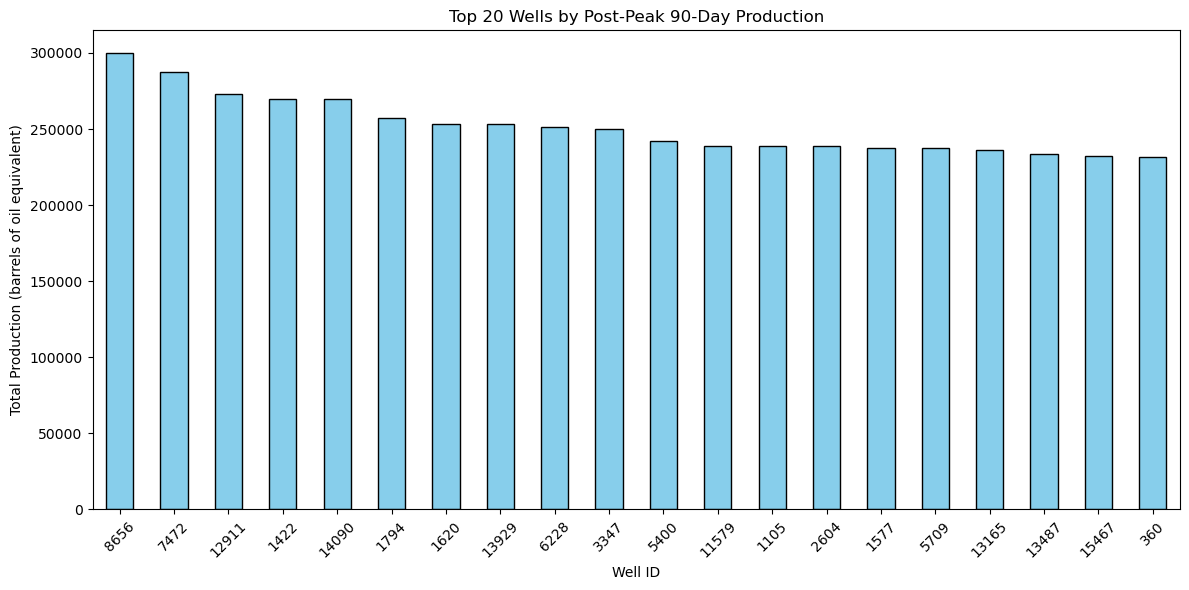

In [16]:
import matplotlib.pyplot as plt

# Sort wells by post-peak 90-day production in descending order
post_peak_90_day_sorted = post_peak_90_day.sort_values(ascending=False)

# Plot the top 20 wells with the highest post-peak 90-day production
plt.figure(figsize=(12, 6))
post_peak_90_day_sorted.head(20).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 20 Wells by Post-Peak 90-Day Production')
plt.xlabel('Well ID')
plt.ylabel('Total Production (barrels of oil equivalent)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [17]:
# Average cycle time by county
county_cycle_time = well_header_df.groupby('county')['cycle_time'].mean()

# Total production by county
county_production = merged_df.groupby('county')['production'].sum()


In [18]:
# Total production grouped by year and month
production_over_time = monthly_production_df.groupby(['year', 'month'])['production'].sum()


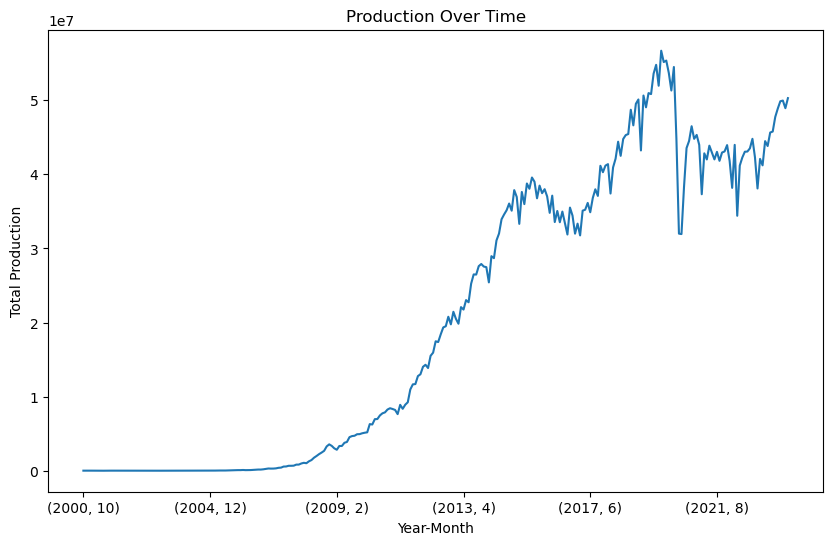

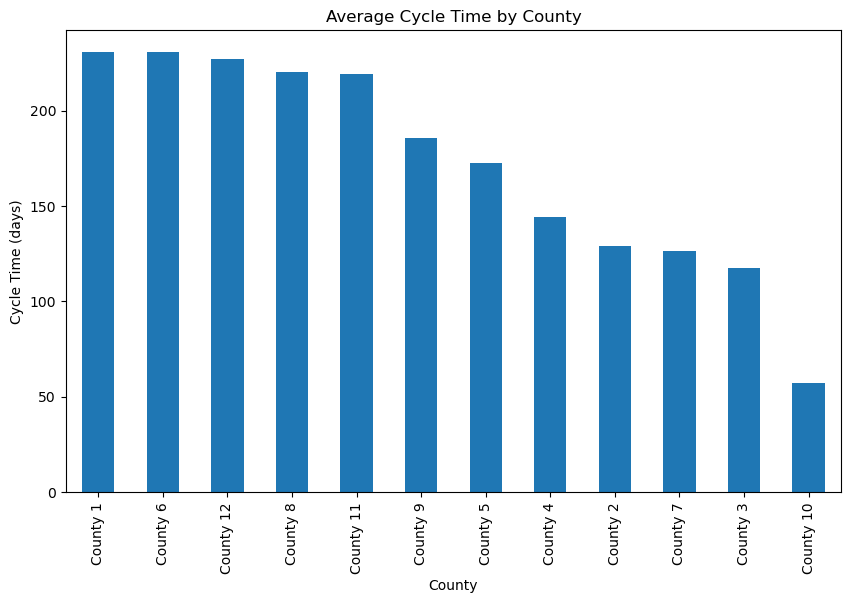

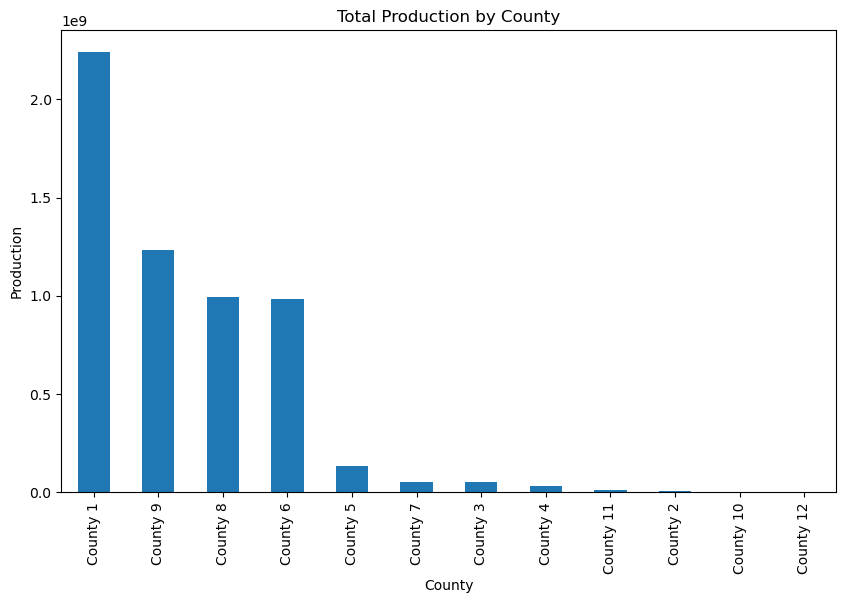

In [19]:
# Production Over Time
plt.figure(figsize=(10, 6))
production_over_time.plot(title='Production Over Time', xlabel='Year-Month', ylabel='Total Production')
plt.show()

# Average Cycle Time by County
# Sort by descending cycle time
county_cycle_time_sorted = county_cycle_time.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
county_cycle_time_sorted.plot(kind='bar', title='Average Cycle Time by County', xlabel='County', ylabel='Cycle Time (days)')
plt.show()

# Total Production by County
# Sort by descending production
county_production_sorted = county_production.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
county_production_sorted.plot(kind='bar', title='Total Production by County', xlabel='County', ylabel='Production')
plt.show()


### Interpretations

##### 1. Cycle Time by County
- Counties **1, 6, and 12** exhibit the **highest average cycle times**, indicating potential inefficiencies or operational challenges in well completion.
- Counties with shorter cycle times, such as County 10, may reflect streamlined processes or more favorable conditions.

##### 2. Production by County
- **County 1** leads in total production, significantly outpacing other counties. This suggests that it should be prioritized for investments and operational focus.
- Other high-producing counties include **County 9, County 3, and County 8**, while the remaining counties contribute relatively less to overall production.

##### 3. Peak 90-Day Production Analysis
- The **post-peak 90-day production** metric reveals a concentration of output in a small subset of wells.
- The top 20 wells with the highest post-peak production contribute disproportionately to total output, emphasizing the importance of monitoring these wells for sustainability and optimization.

##### 4. Production Over Time
- A steady increase in total production over time is observed, with occasional fluctuations.
- This trend may reflect improvements in well efficiency, technological advancements, or increased drilling activity.

##### 5. Insights for Stakeholders
- **Operational Focus**: High-producing counties like County 1 should receive more investment for capacity expansion and technological enhancement.
- **Optimization Needs**: Counties with longer cycle times require a deeper analysis of bottlenecks, potentially involving infrastructure upgrades or process redesign.
- **Well Monitoring**: Top-performing wells should be closely monitored to ensure consistent production levels and identify factors contributing to their success.


### Downloading for Interactive Charts

In [20]:
merged_df.to_csv('merged_well_data.csv', index=False)
print("Saved: merged_well_data.csv")
peak_data.to_csv('peak_production_data.csv', index=False)
print("Saved: peak_production_data.csv")
county_cycle_time.to_csv('cycle_time_by_county.csv', index=True)
print("Saved: cycle_time_by_county.csv")
county_production.to_csv('production_by_county.csv', index=True)

print("Saved: production_by_county.csv")



Saved: merged_well_data.csv
Saved: peak_production_data.csv
Saved: cycle_time_by_county.csv
Saved: production_by_county.csv


### Reference

In [21]:
# Count the number of wells in each county before merging
well_count_before_merge = well_header_df.groupby('county')['well_id'].count()
print("Wells count before merging by county:")
print(well_count_before_merge)

# Count the number of wells in each county after merging
well_count_after_merge = merged_df.groupby('county')['well_id'].nunique()
print("\nWells count after merging by county:")
print(well_count_after_merge)


Wells count before merging by county:
county
County 1     5222
County 10       1
County 11      35
County 12       1
County 2       13
County 3      213
County 4      185
County 5      739
County 6     3220
County 7      282
County 8     2881
County 9     3471
Name: well_id, dtype: int64

Wells count after merging by county:
county
County 1     5222
County 10       1
County 11      35
County 12       1
County 2       13
County 3      213
County 4      185
County 5      739
County 6     3220
County 7      282
County 8     2881
County 9     3471
Name: well_id, dtype: int64


In [22]:
# Combine the counts into a single DataFrame for comparison
well_count_comparison = pd.DataFrame({
    'Wells Before Merging': well_count_before_merge,
    'Wells After Merging': well_count_after_merge
})

# Fill NaN with 0 (in case some counties are missing in either set)
well_count_comparison = well_count_comparison.fillna(0)
print("\nComparison of wells count before and after merging:")
print(well_count_comparison)



Comparison of wells count before and after merging:
           Wells Before Merging  Wells After Merging
county                                              
County 1                   5222                 5222
County 10                     1                    1
County 11                    35                   35
County 12                     1                    1
County 2                     13                   13
County 3                    213                  213
County 4                    185                  185
County 5                    739                  739
County 6                   3220                 3220
County 7                    282                  282
County 8                   2881                 2881
County 9                   3471                 3471


In [23]:
# Calculate total production for each county
production_by_county = merged_df.groupby('county')['production'].sum()

# Convert to DataFrame for better readability
production_by_county_df = production_by_county.reset_index()
production_by_county_df.columns = ['County', 'Total Production']

print("Total Production for Each County:")
print(production_by_county_df)


Total Production for Each County:
       County  Total Production
0    County 1      2.240886e+09
1   County 10      1.692692e+05
2   County 11      9.365644e+06
3   County 12      9.170000e+02
4    County 2      3.614452e+06
5    County 3      5.118218e+07
6    County 4      3.271580e+07
7    County 5      1.352554e+08
8    County 6      9.820336e+08
9    County 7      5.291103e+07
10   County 8      9.958375e+08
11   County 9      1.233771e+09


In [24]:
# Filter the merged DataFrame for County 2 and the years 2017 and 2012
filtered_data = merged_df[
    (merged_df['county'] == 'County 2') & 
    (merged_df['year'].isin([2017, 2012]))
]

# Group by year and calculate the total production
total_production = filtered_data.groupby('year')['production'].sum()

# Print the result
print("Total production for County 2 in 2017 and 2012:")
print(total_production)


Total production for County 2 in 2017 and 2012:
year
2012    376233.17
2017    427002.31
Name: production, dtype: float64


In [25]:
average_cycle_time = merged_df['cycle_time'].mean()

# Display the result
print(f"Average Cycle Time (all data): {average_cycle_time:.2f} days")

Average Cycle Time (all data): 172.68 days
